In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [28]:
df=pd.read_csv("titanic3.csv")

In [29]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [32]:
df.drop(["name","ticket","cabin","fare","boat","body","home.dest"],axis=1,inplace=True)

In [34]:
df.age.fillna(df.age.mean(),inplace=True)

In [36]:
df = df.apply(lambda x: x.fillna(x.mode()[0]))

In [38]:
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

In [39]:
df.head()

,pclass,survived,age,sibsp,parch,sex_male,embarked_Q,embarked_S
0,1.0,1.0,29.0000,0.0,0.0,0,0,1
1,1.0,1.0,0.9167,1.0,2.0,1,0,1
2,1.0,0.0,2.0000,1.0,2.0,0,0,1
3,1.0,0.0,30.0000,1.0,2.0,1,0,1
4,1.0,0.0,25.0000,1.0,2.0,0,0,1


In [40]:
df.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'sex_male', 'embarked_Q',
       'embarked_S'],
      dtype='object')

<Axes: xlabel='survived', ylabel='count'>

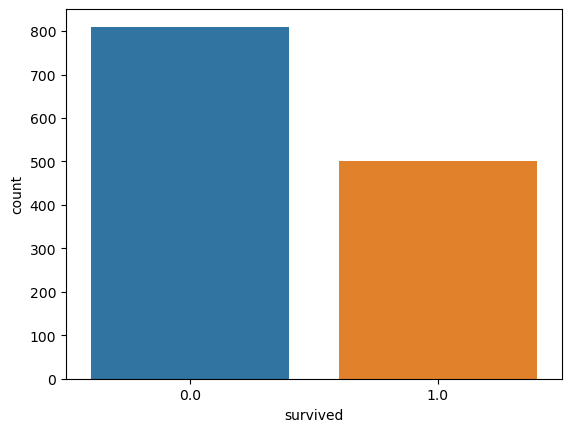

In [48]:
sns.countplot(x="survived",data=df)

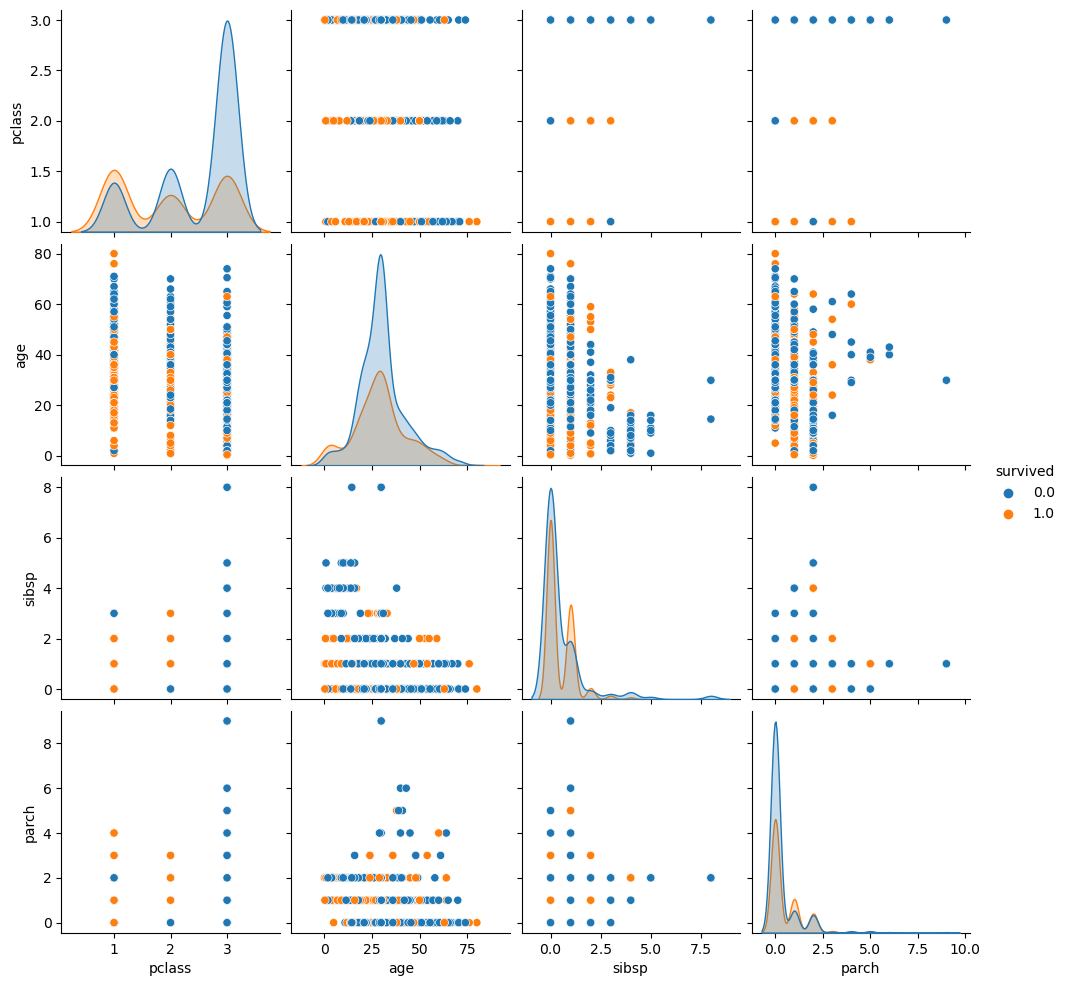

In [41]:
sns.pairplot(df, hue='survived', vars=['pclass', 'age', 'sibsp', 'parch'], diag_kind='kde')
plt.show()

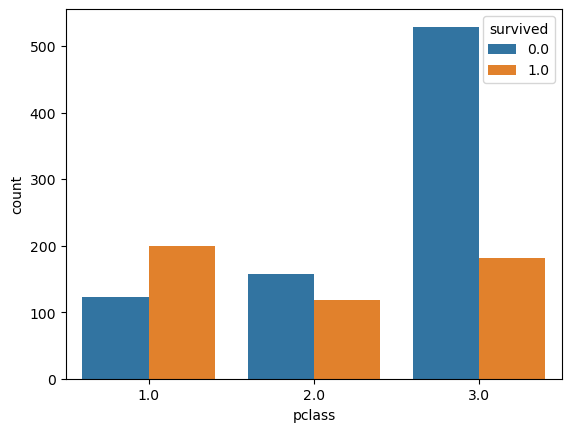

In [45]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.show()

<Axes: xlabel='sex_male', ylabel='count'>

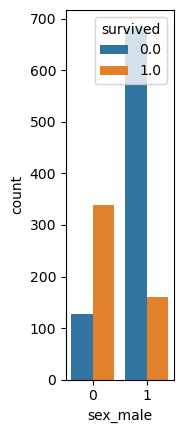

In [46]:
# Countplot for sex
plt.subplot(1, 4, 4)
sns.countplot(x='sex_male', hue='survived', data=df)

In [42]:
# Model Training
features = ['pclass', 'age', 'sibsp', 'parch', 'sex_male', 'embarked_Q', 'embarked_S']
X = df[features]
y = df['survived']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

Accuracy: 0.7977099236641222
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.90      0.84       150
         1.0       0.83      0.66      0.74       112

    accuracy                           0.80       262
   macro avg       0.81      0.78      0.79       262
weighted avg       0.80      0.80      0.79       262

Confusion Matrix:
 [[135  15]
 [ 38  74]]


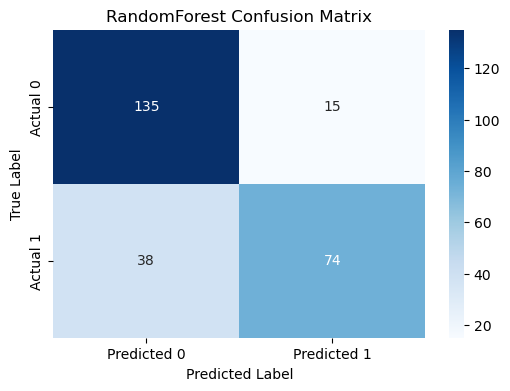

In [54]:
# Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('RandomForest Confusion Matrix')
plt.show()

Accuracy: 0.7862595419847328
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.89      0.83       150
         1.0       0.81      0.65      0.72       112

    accuracy                           0.79       262
   macro avg       0.79      0.77      0.77       262
weighted avg       0.79      0.79      0.78       262

Confusion Matrix:
 [[133  17]
 [ 39  73]]


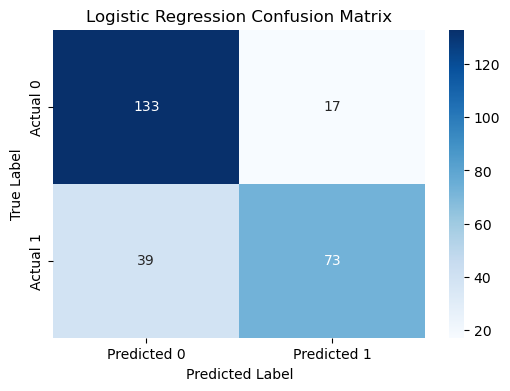

In [55]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg_model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

# Confusion Matrix Heatmap
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

Accuracy: 0.7824427480916031
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.91      0.83       150
         1.0       0.84      0.61      0.70       112

    accuracy                           0.78       262
   macro avg       0.80      0.76      0.77       262
weighted avg       0.79      0.78      0.78       262

Confusion Matrix:
 [[137  13]
 [ 44  68]]


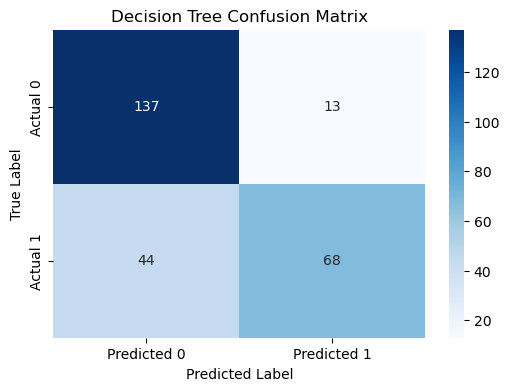

In [56]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))

# Confusion Matrix Heatmap
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Confusion Matrix')
plt.show()